In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
# got it from https://www.ewe-netz.de/einspeiser/strom/redispatch/massnahmen/2023

csv = pd.read_csv("ewe-netz-redispatch-30-07-2024-22-20.csv", delimiter=";")

In [3]:
csv.head()

,MaßnahmenID,SrId,Netzbetreiber,Beginn,Ende,Dauer,Sollwert,Ursache,Entschädigungspflicht,Abrufart
0,EWE202311007246,C1000011173,Avacon,31.12.2023 19:24,01.01.2024 19:39,1455,0 %,Vorgelagerter Netzbetreiber,Ja,Duldungsfall (SW)
1,EWE202311007244,C1000011834,Avacon,31.12.2023 19:24,01.01.2024 19:39,1455,0 %,Vorgelagerter Netzbetreiber,Ja,Duldungsfall (SW)
2,EWE202311007246,C1000013773,Avacon,31.12.2023 19:24,01.01.2024 19:39,1455,0 %,Vorgelagerter Netzbetreiber,Ja,Duldungsfall (SW)
3,EWE202311007246,C1000014549,Avacon,31.12.2023 19:24,01.01.2024 19:39,1455,0 %,Vorgelagerter Netzbetreiber,Ja,Duldungsfall (SW)
4,EWE202311007244,C1000014755,Avacon,31.12.2023 19:24,01.01.2024 19:39,1455,0 %,Vorgelagerter Netzbetreiber,Ja,Duldungsfall (SW)


In [4]:
csv.tail()

,MaßnahmenID,SrId,Netzbetreiber,Beginn,Ende,Dauer,Sollwert,Ursache,Entschädigungspflicht,Abrufart
169416,EWE202311000002,C1000037955,Avacon,01.01.2023 00:01,01.01.2023 00:08,7,30 %,Vorgelagerter Netzbetreiber,Ja,Duldungsfall (SW)
169417,EWE202311000002,C1000037963,Avacon,01.01.2023 00:01,01.01.2023 00:08,7,30 %,Vorgelagerter Netzbetreiber,Ja,Duldungsfall (SW)
169418,EWE202311000002,C1000037971,Avacon,01.01.2023 00:01,01.01.2023 00:08,7,30 %,Vorgelagerter Netzbetreiber,Ja,Duldungsfall (SW)
169419,EWE202311000002,C1000040693,Avacon,01.01.2023 00:01,01.01.2023 00:08,7,30 %,Vorgelagerter Netzbetreiber,Ja,Duldungsfall (SW)
169420,EWE202311000002,C1000040940,Avacon,01.01.2023 00:01,01.01.2023 00:08,7,30 %,Vorgelagerter Netzbetreiber,Ja,Duldungsfall (SW)


In [5]:
redispatch_frame = pd.DataFrame(csv, columns=["Beginn"])

In [6]:
redispatch_frame["Beginn"] = pd.to_datetime(redispatch_frame["Beginn"], format="%d.%m.%Y %H:%M")
redispatch_frame["Beginn"] = redispatch_frame["Beginn"].apply(lambda x: x.date())

In [7]:
print(redispatch_frame)

            Beginn
0       2023-12-31
1       2023-12-31
2       2023-12-31
3       2023-12-31
4       2023-12-31
...            ...
169416  2023-01-01
169417  2023-01-01
169418  2023-01-01
169419  2023-01-01
169420  2023-01-01

[169421 rows x 1 columns]


In [35]:
redispatch_count_frame = redispatch_frame.groupby("Beginn").value_counts().rename_axis('Datum').reset_index(name='count')

In [36]:
redispatch_count_frame


,Datum,count
0,2023-01-01,640
1,2023-01-02,295
2,2023-01-03,477
3,2023-01-04,1324
4,2023-01-05,130
...,...,...
270,2023-12-27,352
271,2023-12-28,1737
272,2023-12-29,1380
273,2023-12-30,689


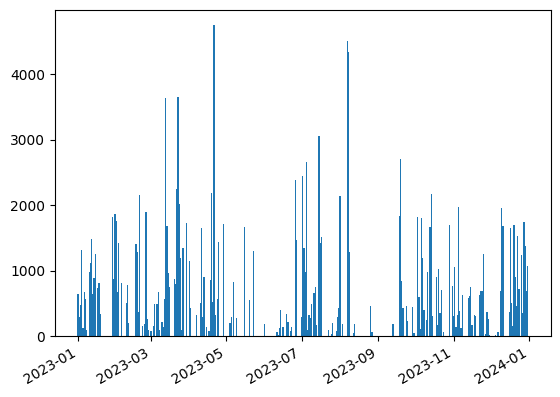

In [37]:
interval = datetime.timedelta(days=1)

fig, ax = plt.subplots()
ax.bar(redispatch_count_frame["Datum"], redispatch_count_frame["count"], width=interval)

fig.autofmt_xdate()
plt.show()